In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a, b = 0, 1

In [3]:
# аналитическое решение
x_exact = np.linspace(a, b, 1000)
y_exact = x_exact ** 2 * 3.5 - x_exact * 3.5 + np.exp(x_exact) + 1 / np.exp(x_exact) - 2

## Метод стрельбы

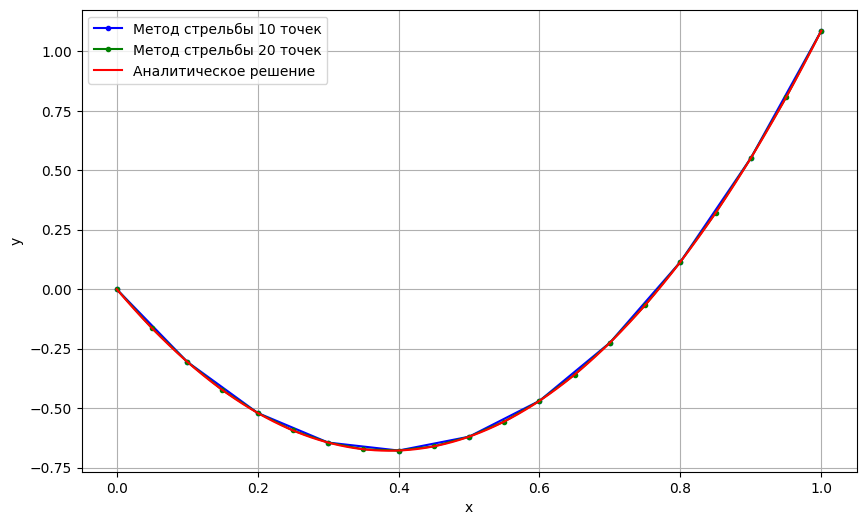

In [4]:
def f(x, Y):
    # Y: [y, dy]
    # возвращает [dy, ddy]
    return np.array([Y[1], Y[0] + 3.5 * x * (1 - x) + 9])


def rk4_method(Y0, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    Y = np.zeros((n + 1, 2)) # первый столбец игрики, второй игрик штрихи
    Y[0] = Y0
    for i in range(n):
        k1 = f(x[i], Y[i])
        k2 = f(x[i] + h / 2, Y[i] + h * k1 / 2)
        k3 = f(x[i] + h / 2, Y[i] + h * k2 / 2)
        k4 = f(x[i] + h, Y[i] + h * k3)
        Y[i + 1] = Y[i] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return Y


def shooting_method(n):
    mu = 0

    for _ in range(100):
        Y = rk4_method([0, mu], n)
        dy_b = Y[-1, 0]
        ddy_b = Y[-1, 1]
        phi = dy_b + ddy_b - 2 * np.exp(1) - 1.5

        mu, mu_old = mu - phi / np.exp(1), mu # d(phi) = np.exp(1)

        if abs(mu_old - mu) < 1e-5:
            break

    return Y[:, 0]


x10 = np.linspace(a, b, 11)
y10_shoot = shooting_method(n=10)
x20 = np.linspace(a, b, 21)
y20_shoot = shooting_method(n=20)

plt.figure(figsize=(10, 6))
plt.plot(x10, y10_shoot, label="Метод стрельбы 10 точек", color='blue', marker='.')
plt.plot(x20, y20_shoot, label="Метод стрельбы 20 точек", color='green', marker='.')
plt.plot(x_exact, y_exact, label="Аналитическое решение", color='red')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()


## Метод прогонки

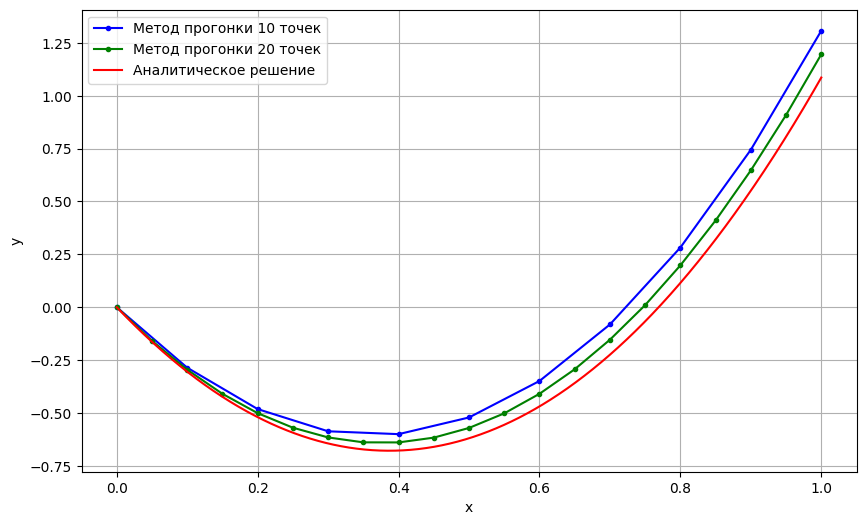

In [8]:
def q(x):
    return 9 + 3.5 * x * (1 - x)

def progonka(n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    for i in range(1, n):
        A[i, i - 1] = 1
        A[i, i] = -2 - (h ** 2)
        A[i, i + 1] = 1
        B[i] = q(x[i]) * (h ** 2)

    # граничные условия
    A[0, 0] = 1
    B[0] = 0
    A[n, n - 1] = 1
    A[n, n] = -h - 1
    B[n] = -h * (2 * np.exp(1) + 1.5)

    lmbd = [0] * (n + 2)
    mu = [0] * (n + 2)

    # прямая прогонка
    for i in range(1, n + 1):
        lmbd[i + 1] = 1 / (-A[i][i] - lmbd[i])
        mu[i + 1] = (mu[i] - B[i]) / (-A[i][i] - lmbd[i])

    y = [0] * (n + 1)
    y[n] = (mu[n] - B[n]) / (-A[n][n] - lmbd[n])

    # обратная прогонка
    for i in range(n, 0, -1):
        y[i - 1] = lmbd[i] * y[i] + mu[i]

    return y



x10 = np.linspace(a, b, 11)
y10_progonka = progonka(n=10)
x20 = np.linspace(a, b, 21)
y20_progonka = progonka(n=20)

plt.figure(figsize=(10, 6))
plt.plot(x10, y10_progonka, label="Метод прогонки 10 точек", color='blue', marker='.')
plt.plot(x20, y20_progonka, label="Метод прогонки 20 точек", color='green', marker='.')
plt.plot(x_exact, y_exact, label="Аналитическое решение", color='red')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()


## Сравнение методов

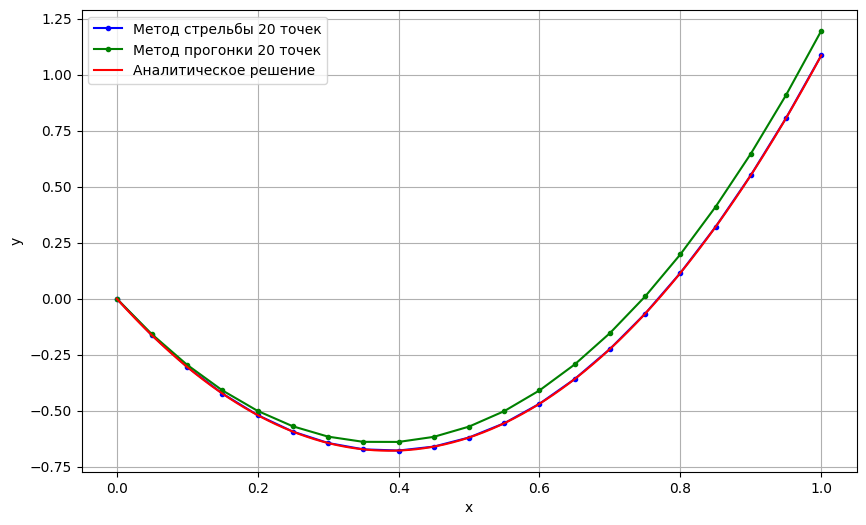

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x20, y20_shoot, label="Метод стрельбы 20 точек", color='blue', marker='.')
plt.plot(x20, y20_progonka, label="Метод прогонки 20 точек", color='green', marker='.')
plt.plot(x_exact, y_exact, label="Аналитическое решение", color='red')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

# Вывод:

Для этой функции и граничных условий метод стрельбы сходится быстрее